## Intravenous therapy

Intravenous therapy (abbreviated as IV therapy) is a medical technique that administers fluids, medications and nutrients directly into a person's vein. The intravenous route of administration is commonly used for rehydration or to provide nutrients for those who cannot, or will not—due to reduced mental states or otherwise—consume food or water by mouth.

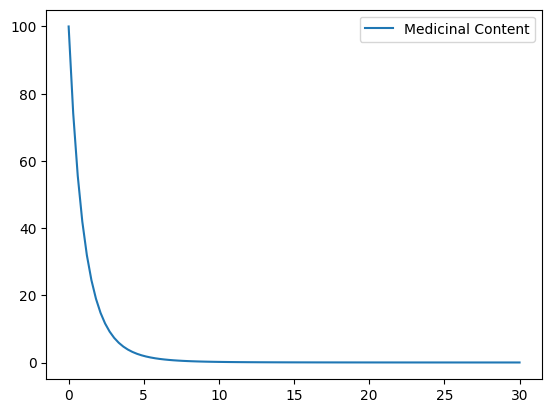

In [106]:
import torch
import matplotlib.pyplot as plt
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp, mid_point_ivp, fwd_euler_ivp, rk38_ivp

def i_v_injection(variables, t, params):
    M = variables[0]

    k_ao = params

    dMdt = - M * torch.e ** (-k_ao * t)

    return torch.tensor([dMdt])

t = torch.linspace(0, 30, 100)

params = torch.tensor([0.1])

y0 = torch.tensor([100])

y = rk4_ivp(i_v_injection, y0, t, params)

plt.plot(t, y)
plt.legend(["Medicinal Content",])
plt.show()

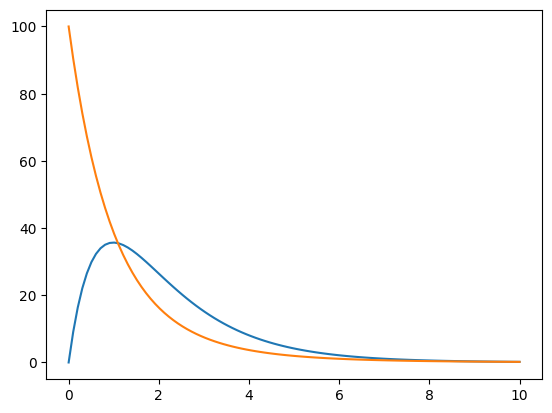

In [122]:
import torch
import matplotlib.pyplot as plt
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp

def i_v_injection(variables, t, params):
    M, I = variables

    k_oa, k_ao = params

    dMdt = I * torch.e ** (-k_oa*t) - M * torch.e ** (-k_ao*t)
    dIdt = - I * torch.e ** (-k_oa*t)

    return torch.tensor([dMdt, dIdt])

t = torch.linspace(0, 10, 100)

params = torch.tensor([0.1, 0.01])

y0 = torch.tensor([0, 100])

y = rk4_ivp(i_v_injection, y0, t, params)

plt.plot(t, y)
#plt.legend(["Medicinal Content"])
plt.show()

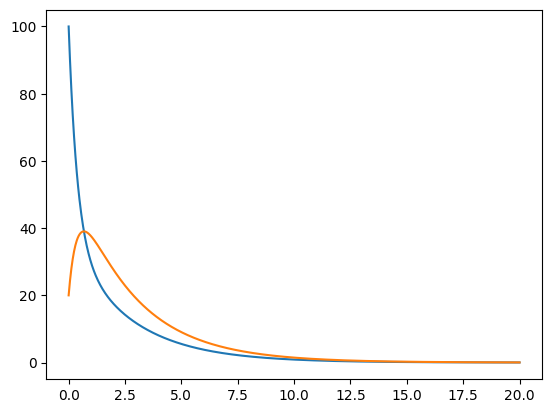

In [109]:
import torch
import matplotlib.pyplot as plt
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp

def i_v_injection(variables, t, params):
    A, B = variables

    k_ao, k_ab, k_ba = params

    dAdt = - A * torch.e ** (-k_ao*t) - A * torch.e ** (-k_ab*t) + B * torch.e ** (-k_ab*t)
    dBdt = - B * torch.e ** (-k_ba*t) + A * torch.e ** (-k_ab*t)

    return torch.tensor([dAdt, dBdt])

t = torch.linspace(0, 20, 1000)

a = 0.005
b = 0.01
c = 0.01

params = torch.tensor([a, b, c])

y0 = torch.tensor([100, 20])

y = rk4_ivp(i_v_injection, y0, t, params)

plt.plot(t, y)
#plt.legend(["Medicinal Content",])
plt.show()

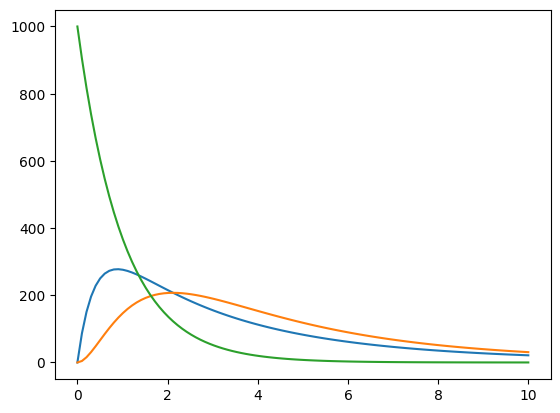

In [119]:
import torch
import matplotlib.pyplot as plt
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp

def i_v_injection(variables, t, params):
    A, B, I = variables

    k_oa, k_ao, k_ab, k_ba = params

    dAdt = - A * torch.e ** (-k_ao*t) - A * torch.e ** (-k_ab*t) + B * torch.e ** (-k_ab*t) + I * torch.e ** (-k_oa*t)
    dBdt = - B * torch.e ** (-k_ba*t) + A * torch.e ** (-k_ab*t)
    dIdt = - I * torch.e ** (-k_oa*t)

    return torch.tensor([dAdt, dBdt, dIdt])

t = torch.linspace(0, 10, 100)

params = torch.tensor([0.01, 0.05, 0.02, 0.02])

y0 = torch.tensor([0, 0, 1000])

y = rk4_ivp(i_v_injection, y0, t, params)

plt.plot(t, y)
plt.show()

In [8]:
import torch
import matplotlib.pyplot as plt
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp

def i_v_injection(variables, t, k_oa, k_ao, k_ab, k_ba):
    A, B, I = variables

    k_oa, k_ao, k_ab, k_ba = k_oa, k_ao, k_ab, k_ba

    dAdt = - A * torch.e ** (-k_ao*t) - A * torch.e ** (-k_ab*t) + B * torch.e ** (-k_ab*t) + I * torch.e ** (-k_oa*t)
    dBdt = - B * torch.e ** (-k_ba*t) + A * torch.e ** (-k_ab*t)
    dIdt = - I * torch.e ** (-k_oa*t)

    return torch.tensor([dAdt, dBdt, dIdt])

t = torch.linspace(0, 10, 100)

params = torch.tensor([0.01, 0.05, 0.02, 0.02])

y0 = torch.tensor([0, 0, 1000])

from scipy.integrate import solve_ivp

y = solve_ivp(i_v_injection, [0, 10], y0, args=[0.01, 0.05, 0.02, 0.02])

plt.plot(t, y)
plt.show()

TypeError: cannot unpack non-iterable float object

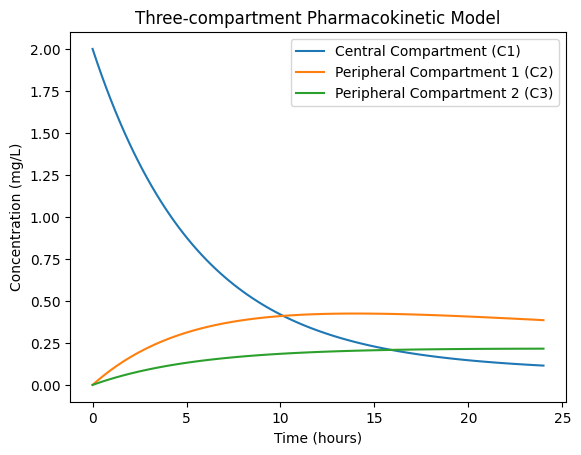

In [7]:
import numpy as np
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk38_ivp
import matplotlib.pyplot as plt
import torch

# Parameters
dose = 100  # Initial dose in mg
Vd_central = 50  # Volume of central compartment (L)
kel = 0.1  # Elimination rate constant from central compartment (1/hr)
k12 = 0.05  # Transfer rate constant from central to peripheral 1 (1/hr)
k21 = 0.03  # Transfer rate constant from peripheral 1 to central (1/hr)
k13 = 0.02  # Transfer rate constant from central to peripheral 2 (1/hr)
k31 = 0.01  # Transfer rate constant from peripheral 2 to central (1/hr)

# Initial concentrations (C1 in central, C2 in peripheral 1, C3 in peripheral 2)
C1_0 = dose / Vd_central
C2_0 = 0  # No drug initially in peripheral compartments
C3_0 = 0
initial_conditions = torch.tensor([C1_0, C2_0, C3_0])

# Time points (in hours)
time = np.linspace(0, 24, 100)

# ODE system for the 3-compartment model
def three_compartment_model(C, t, params):
    C1, C2, C3 = C
    kel, k12, k21, k13, k31 = params
    dC1dt = -kel * C1 - k12 * C1 + k21 * C2 - k13 * C1 + k31 * C3
    dC2dt = k12 * C1 - k21 * C2
    dC3dt = k13 * C1 - k31 * C3
    return torch.tensor([dC1dt, dC2dt, dC3dt])

# Solve ODE system
conc = rk38_ivp(three_compartment_model,
                          initial_conditions,
                          time,
                          params=torch.tensor([kel, k12, k21, k13, k31]))

plt.plot(time, conc[:, 0], label='Central Compartment (C1)')
plt.plot(time, conc[:, 1], label='Peripheral Compartment 1 (C2)')
plt.plot(time, conc[:, 2], label='Peripheral Compartment 2 (C3)')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L)')
plt.title('Three-compartment Pharmacokinetic Model')
plt.legend()
plt.show()

In [6]:
concentrations[:, 0]

tensor([[2.0000, 0.0000, 0.0000],
        [1.9193, 0.0237, 0.0095],
        [1.8421, 0.0462, 0.0186],
        [1.7682, 0.0677, 0.0273],
        [1.6975, 0.0881, 0.0356],
        [1.6297, 0.1075, 0.0436],
        [1.5649, 0.1261, 0.0512],
        [1.5028, 0.1437, 0.0585],
        [1.4433, 0.1604, 0.0655],
        [1.3864, 0.1763, 0.0722],
        [1.3319, 0.1915, 0.0786],
        [1.2798, 0.2058, 0.0847],
        [1.2298, 0.2195, 0.0906],
        [1.1820, 0.2325, 0.0962],
        [1.1362, 0.2448, 0.1016],
        [1.0924, 0.2565, 0.1067],
        [1.0504, 0.2676, 0.1117],
        [1.0102, 0.2781, 0.1164],
        [0.9717, 0.2880, 0.1209],
        [0.9349, 0.2974, 0.1252],
        [0.8996, 0.3064, 0.1294],
        [0.8658, 0.3148, 0.1333],
        [0.8334, 0.3228, 0.1371],
        [0.8024, 0.3303, 0.1407],
        [0.7727, 0.3374, 0.1442],
        [0.7443, 0.3441, 0.1475],
        [0.7171, 0.3505, 0.1507],
        [0.6910, 0.3564, 0.1538],
        [0.6661, 0.3620, 0.1567],
        [0.642

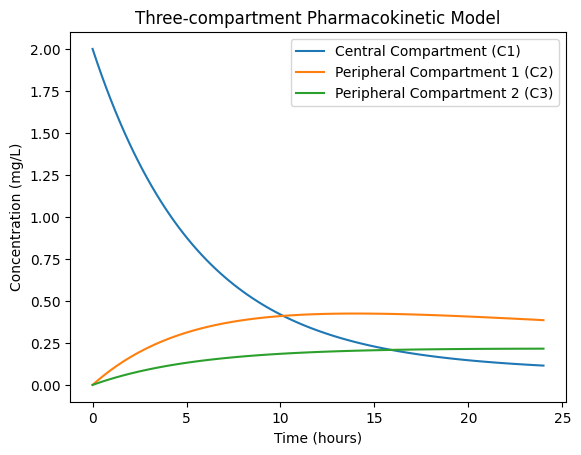

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
dose = 100  # Initial dose in mg
Vd_central = 50  # Volume of central compartment (L)
kel = 0.1  # Elimination rate constant from central compartment (1/hr)
k12 = 0.05  # Transfer rate constant from central to peripheral 1 (1/hr)
k21 = 0.03  # Transfer rate constant from peripheral 1 to central (1/hr)
k13 = 0.02  # Transfer rate constant from central to peripheral 2 (1/hr)
k31 = 0.01  # Transfer rate constant from peripheral 2 to central (1/hr)

# Initial concentrations (C1 in central, C2 in peripheral 1, C3 in peripheral 2)
C1_0 = dose / Vd_central
C2_0 = 0  # No drug initially in peripheral compartments
C3_0 = 0
initial_conditions = [C1_0, C2_0, C3_0]

# Time points (in hours)
time = np.linspace(0, 24, 100)

# ODE system for the 3-compartment model
def three_compartment_model(C, t, kel, k12, k21, k13, k31):
    C1, C2, C3 = C
    dC1dt = -kel * C1 - k12 * C1 + k21 * C2 - k13 * C1 + k31 * C3
    dC2dt = k12 * C1 - k21 * C2
    dC3dt = k13 * C1 - k31 * C3
    return [dC1dt, dC2dt, dC3dt]

# Solve ODE system
concentrations = odeint(three_compartment_model, initial_conditions, time, args=(kel, k12, k21, k13, k31))

# Plot the results
C1, C2, C3 = concentrations.T  # Unpack concentrations for each compartment

plt.plot(time, C1, label='Central Compartment (C1)')
plt.plot(time, C2, label='Peripheral Compartment 1 (C2)')
plt.plot(time, C3, label='Peripheral Compartment 2 (C3)')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L)')
plt.title('Three-compartment Pharmacokinetic Model')
plt.legend()
plt.show()


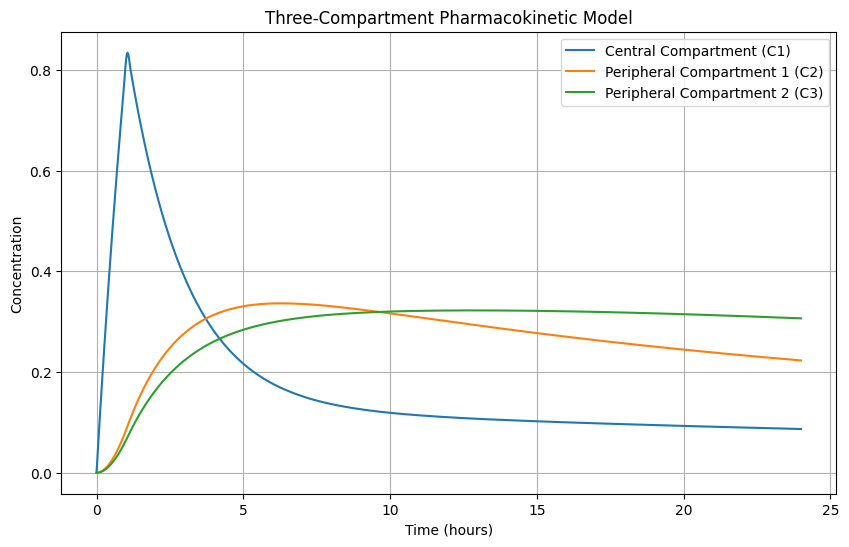

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the rate constants (example values)
k12 = 0.2  # Rate constant from central to peripheral 1
k21 = 0.1  # Rate constant from peripheral 1 to central
k13 = 0.15 # Rate constant from central to peripheral 2
k31 = 0.05 # Rate constant from peripheral 2 to central
k10 = 0.1  # Elimination rate constant from central compartment

# Input rate function (constant rate for example)
def R(t):
    return 1.0 if t <= 1 else 0.0  # Constant input for the first hour

# Define the system of differential equations
def pk_model(t, C):
    C1, C2, C3 = C
    dC1_dt = R(t) - (k12 + k13 + k10) * C1 + k21 * C2 + k31 * C3
    dC2_dt = k12 * C1 - k21 * C2
    dC3_dt = k13 * C1 - k31 * C3
    return [dC1_dt, dC2_dt, dC3_dt]

# Initial conditions (initial concentrations in each compartment)
C0 = [0, 0, 0]  # No drug initially in any compartment

# Time span for the solution
t_span = (0, 24)  # Solve from t = 0 to t = 24 hours
t_eval = np.linspace(0, 24, 1000)  # Evaluate at 1000 points for a smooth curve

# Solve the differential equations
solution = solve_ivp(pk_model, t_span, C0, t_eval=t_eval, method='RK45')

# Extract the solution
t = solution.t
C1, C2, C3 = solution.y

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, C1, label='Central Compartment (C1)')
plt.plot(t, C2, label='Peripheral Compartment 1 (C2)')
plt.plot(t, C3, label='Peripheral Compartment 2 (C3)')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration')
plt.title('Three-Compartment Pharmacokinetic Model')
plt.legend()
plt.grid(True)
plt.savefig('compartment-model')
plt.show()


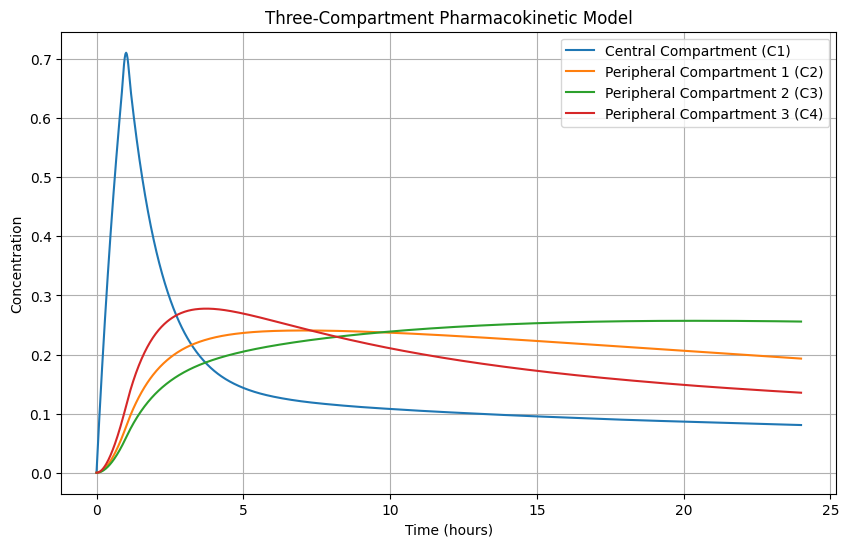

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the rate constants (example values)
k12 = 0.2  # Rate constant from central to peripheral 1
k21 = 0.1  # Rate constant from peripheral 1 to central
k13 = 0.15 # Rate constant from central to peripheral 2
k31 = 0.05 # Rate constant from peripheral 2 to central
k14 = 0.3  # Rate constant from central to peripheral 3
k41 = 0.2  # Rate constant from peripheral 3 to central
k10 = 0.1  # Elimination rate constant from central compartment

# Input rate function (constant rate for example)
def R(t):
    return 1.0 if t <= 1 else 0.0  # Constant input for the first hour

# Define the system of differential equations
def pk_model(t, C):
    C1, C2, C3, C4 = C
    dC1_dt = R(t) - (k12 + k13 +k14 + k10) * C1 + k21 * C2 + k31 * C3 + k41 * C4
    dC2_dt = k12 * C1 - k21 * C2
    dC3_dt = k13 * C1 - k31 * C3
    dC4_dt = k14 * C1 - k41 * C4
    return [dC1_dt, dC2_dt, dC3_dt, dC4_dt]

# Initial conplt.plot(t, C3, label='Peripheral Compartment 2 (C3)')ditions (initial concentrations in each compartment)
C0 = [0, 0, 0, 0]  # No drug initially in any compartment

# Time span for the solution
t_span = (0, 24)  # Solve from t = 0 to t = 24 hours
t_eval = np.linspace(0, 24, 1000)  # Evaluate at 1000 points for a smooth curve

# Solve the differential equations
solution = solve_ivp(pk_model, t_span, C0, t_eval=t_eval, method='RK45')

# Extract the solution
t = solution.t
C1, C2, C3, C4 = solution.y

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, C1, label='Central Compartment (C1)')
plt.plot(t, C2, label='Peripheral Compartment 1 (C2)')
plt.plot(t, C3, label='Peripheral Compartment 2 (C3)')
plt.plot(t, C4, label='Peripheral Compartment 3 (C4)')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration')
plt.title('Three-Compartment Pharmacokinetic Model')
plt.legend()
plt.grid(True)
plt.savefig('compartment-model')
plt.show()

In [66]:
import torch
import matplotlib.pyplot as plt
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp

def i_v_injection(variables, t, params):
    A, B, C, I = variables

    N = A + B + C + I

    k_oa, k_ao, k_ab, k_ba, k_ac, k_ca, k_bc, k_cb = params

    dAdt = k_oa*I + k_ba*B + k_ca*C - k_ao*A - k_ab*A - k_ac*A
    dBdt = k_ab*A + k_cb*C - k_ba*B - k_bc*B
    dCdt = k_ac*A + k_bc*B - k_ca*C - k_cb*C

    return torch.tensor([dAdt, dBdt, dCdt])

t = torch.linspace(0, 1600, 1000)

params = torch.tensor([0.01, 0.05, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01])

y0 = torch.tensor([100, 20, 300])

y = rk4_ivp(i_v_injection, y0, t, params)

plt.plot(t, y)
#plt.legend(["Medicinal Content",])
plt.show()

ValueError: not enough values to unpack (expected 4, got 3)

A -> B
|
v
O

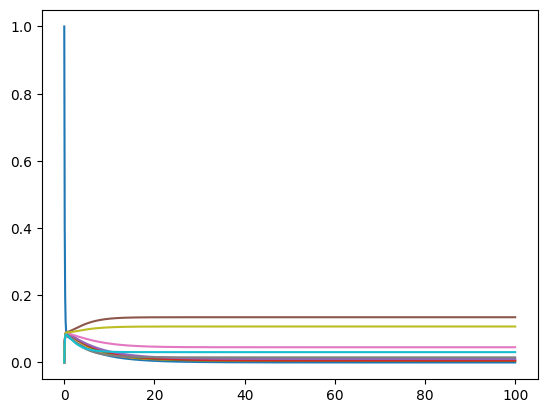

In [37]:
import torch
import matplotlib.pyplot as plt
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp

def comp_10_model(variables, t, params):
    A, B, C, D, E, F, G, H, I, J = variables

    k_ao, k_ab, k_ba, k_ac, k_ca, k_ad, k_da, k_ae, k_ea, k_af, k_fa, k_ag, k_ga, k_ah, k_ha, k_ai, k_ia, k_aj, k_ja = params

    
    dAdt = - A * (torch.e ** (-k_ao) + torch.e ** (-k_ab) + torch.e ** (-k_ac) + torch.e ** (-k_ad) + torch.e ** (-k_ae) + torch.e ** (-k_af) + torch.e ** (-k_ag) + torch.e ** (-k_ah) + torch.e ** (-k_ai-+) + torch.e ** (-k_aj*t)) + B * torch.e ** (-k_ba*t) + C * torch.e ** (-k_ca*t) + D * torch.e ** (-k_da*t) + E * torch.e ** (-k_ea*t) + F * torch.e ** (-k_fa*t) + G * torch.e ** (-k_ga*t) + H * torch.e ** (-k_ha*t) + I * torch.e ** (-k_ia*t) + J * torch.e ** (-k_ja*t)
    dBdt = + A * torch.e ** (-k_ab) - B * torch.e ** (-k_ba)
    dCdt = + A * torch.e ** (-k_ac) - C * torch.e ** (-k_ca)
    dDdt = + A * torch.e ** (-k_ad) - D * torch.e ** (-k_da)
    dEdt = + A * torch.e ** (-k_ae) - E * torch.e ** (-k_ea)
    dFdt = + A * torch.e ** (-k_af) - F * torch.e ** (-k_fa)
    dGdt = + A * torch.e ** (-k_ag) - G * torch.e ** (-k_ga)
    dHdt = + A * torch.e ** (-k_ah) - H * torch.e ** (-k_ha)
    dIdt = + A * torch.e ** (-k_ai) - I * torch.e ** (-k_ia)
    dJdt = + A * torch.e ** (-k_aj) - J * torch.e ** (-k_ja)

    return torch.tensor([dAdt, dBdt, dCdt, dDdt, dEdt, dFdt, dGdt, dHdt, dIdt, dJdt])

t = torch.linspace(0, 100, 1000)

params = torch.tensor([0.01, 0.15, 0.12, 0.12, 0.11, 0.11, 0.11, 0.12, 0.13, 0.22, 0.51, 0.15, 0.22, 0.41, 0.24, 0.21, 0.41, 0.71, 0.41])

y0 = torch.tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

y = rk4_ivp(comp_10_model, y0, t, params)

plt.plot(t, y)
plt.show()